## Logistic_Regression_Handling_Imbalanced_data

In [3]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Reading Data

In [4]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<b> Original Data Target Classes

In [5]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Processing Data

In [6]:
churnData.dtypes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.isna().sum()
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

## Building the model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)
print(classification.score(X_test, y_test))
#y_pred_test

0.783719829626124


<b> Random Forest

In [13]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7628963558920966


<b> Accuracy  </b>

In [188]:
def performance_log(y_test, y_pred_test):
    return pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test,pos_label="Yes")]})

In [190]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.785613
1,Precision,0.628866
2,Recall,0.441230


In [191]:
def plot_conf_matrix(y_test, y_pred_test):
    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test))
    plot_confusion_matrix(classification,X_test,y_test, values_format = 'd')
    plt.show()

In [193]:
X_test.shape

(2113, 4)

Confusion matrix for the test set
[[1416  144]
 [ 309  244]]


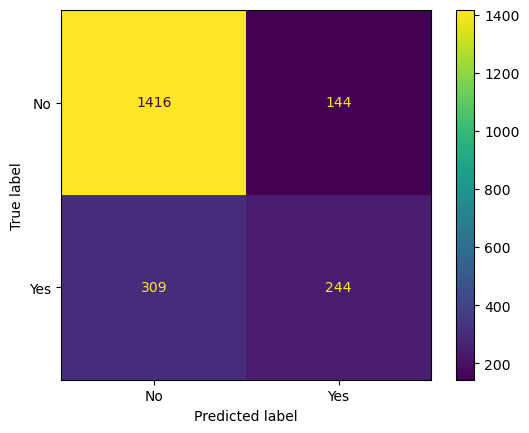

In [194]:
plot_conf_matrix(y_test, y_pred_test)

## Managing imbalance

## Upsampling

In [195]:
counts = churnData['Churn'].value_counts()
counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [196]:
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)

In [197]:
data['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [198]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [199]:
classification.score(X_test, y_test)

0.7359098228663447

In [200]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.735910
1,Precision,0.732536
2,Recall,0.746632


Confusion matrix for the test set
[[1121  425]
 [ 395 1164]]


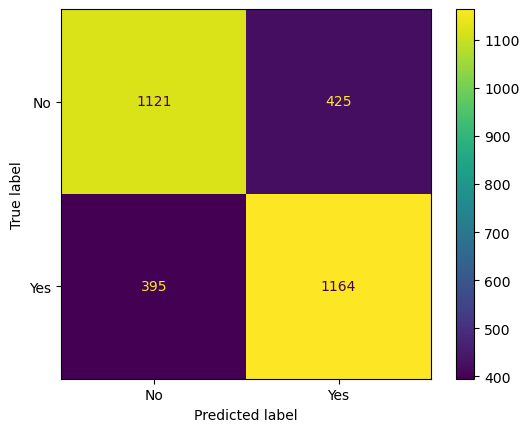

In [201]:
plot_conf_matrix(y_test, y_pred_test)

## Downsampling

In [202]:
yes = churnData[churnData['Churn']=='Yes']
no = churnData[churnData['Churn']=='No']
no = no.sample(len(yes))
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [203]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.33)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [204]:
classification.score(X_test, y_test)

0.7390599675850892

In [205]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.739060
1,Precision,0.717231
2,Recall,0.789303
